<h1><center><font color = "20b1fd">Twitter Data Analysis </font></h1>
 <h3><font color = "20b1fd">  Objective </font></h3>



- <font color = "#283655" size="3">The main goal is to look at people's feelings, attitudes, opinions, and emotions based on COVID 19 data that was gathered using certain keywords. In the end, we show if the tweet has
a positive, negative, or neutral sentiment.</font>


In [1]:
#import necessary libraries 
# linear algebra and data processing
import pandas as pd
import numpy as np

#visualisations
import matplotlib.pyplot as plt
import seaborn as sns

#Library for Modelling 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import CountVectorizer

# ignore warnings
import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv("../data/clean_processed_tweet_data.csv")


In [3]:
df.head()

,Unnamed: 0,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place
0,0,Fri Jun 18 17:55:49 +0000 2021,"<a href=""http://twitter.com/download/iphone"" r...","🚨Africa is ""in the midst of a full-blown third...",0.166667,0.188889,en,548.0,612.0,ketuesriche,551,351,NaN,[],NaN,Mass
1,1,Fri Jun 18 17:55:59 +0000 2021,"<a href=""https://mobile.twitter.com"" rel=""nofo...","Dr Moeti is head of WHO in Africa, and one of ...",0.133333,0.455556,en,195.0,92.0,Grid1949,66,92,NaN,[],NaN,"Edinburgh, Scotland"
2,2,Fri Jun 18 17:56:07 +0000 2021,"<a href=""http://twitter.com/download/iphone"" r...",Thank you @research2note for creating this ama...,0.316667,0.483333,en,2.0,1.0,LeeTomlinson8,1195,1176,NaN,"[{'text': 'red4research', 'indices': [87, 100]}]",NaN,NaN
3,3,Fri Jun 18 17:56:10 +0000 2021,"<a href=""https://mobile.twitter.com"" rel=""nofo...","Former Pfizer VP and Virologist, Dr. Michael Y...",0.086111,0.197222,en,1580.0,899.0,RIPNY08,2666,2704,NaN,"[{'text': 'Covid19', 'indices': [145, 153]}]",NaN,NaN
4,4,Fri Jun 18 17:56:20 +0000 2021,"<a href=""http://twitter.com/download/android"" ...",I think it’s important that we don’t sell COVA...,0.280000,0.620000,en,72.0,20.0,pash22,28250,30819,NaN,[],NaN,United Kingdom


In [4]:
Clean_Tweet = df[['original_text','polarity']]

In [5]:

def text_category (p):
    if p > 0:
        return 'positive'
    if p < 0:
        return 'negative'
    else:
        return 'neutral'

In [6]:
score = pd.Series([text_category(row_value) for row_value in Clean_Tweet['polarity']])

Clean_Tweet = pd.concat([Clean_Tweet, score.rename("score")], axis=1)

Clean_Tweet.head()


,original_text,polarity,score
0,"🚨Africa is ""in the midst of a full-blown third...",0.166667,positive
1,"Dr Moeti is head of WHO in Africa, and one of ...",0.133333,positive
2,Thank you @research2note for creating this ama...,0.316667,positive
3,"Former Pfizer VP and Virologist, Dr. Michael Y...",0.086111,positive
4,I think it’s important that we don’t sell COVA...,0.280000,positive


In [7]:
len(Clean_Tweet['polarity'])

6225

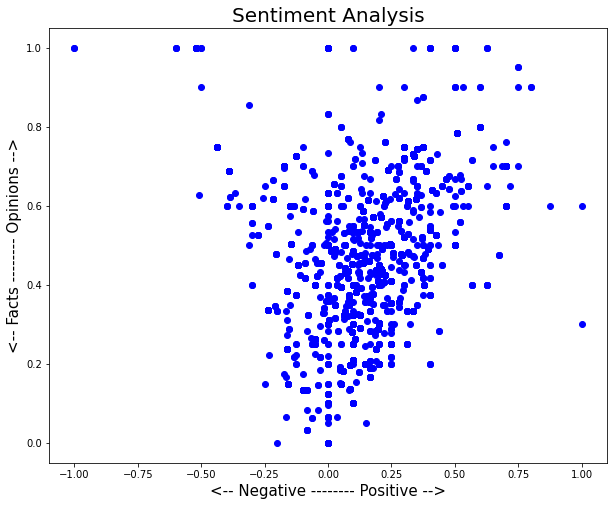

In [20]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

x = df.polarity
y = df.subjectivity
plt.scatter(x, y, color='blue')

plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

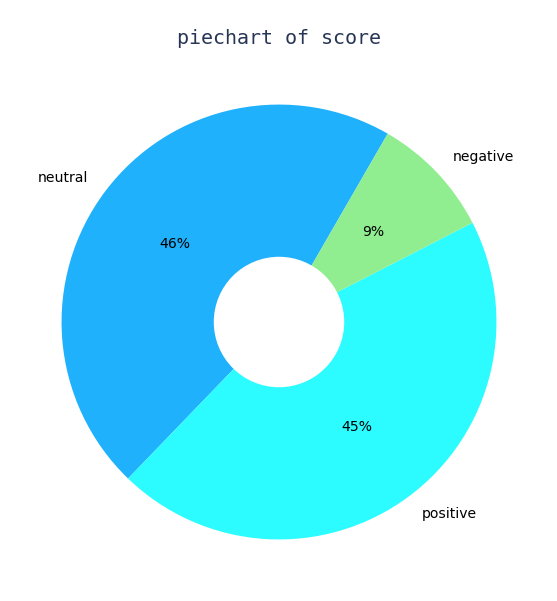

In [44]:
fig, ax  = plt.subplots(figsize=(20, 10))
labels = ['neutral', 'positive', 'negative']
neutral_count = len(Clean_Tweet[Clean_Tweet['score'] == "neutral"])
positive_count = len(Clean_Tweet[Clean_Tweet['score'] == "positive"])
negative_count = len(Clean_Tweet[Clean_Tweet['score'] == "negative"])
sizes = [neutral_count, positive_count, negative_count]
ax.pie(sizes,startangle=60, labels=labels,autopct='%1.0f%%', colors=["#20b1fd","#2cfbff","#90ee90"],textprops={'fontsize': 14})
ax.add_artist(plt.Circle((0,0),0.3,fc='white'))
ax.set_title('\npiechart of score', fontsize = 20,fontname = 'monospace', color = '#283655')
fig.show()


In [9]:
scoremap = pd.Series([1 if row_value == 'positive' else 0 for row_value in Clean_Tweet['score']])

In [10]:

Clean_Tweet = pd.concat([Clean_Tweet, scoremap.rename("scoremap")], axis=1)
Clean_Tweet['scoremap'] = scoremap
Clean_Tweet.reset_index()


,index,original_text,polarity,score,scoremap
0,0,"🚨Africa is ""in the midst of a full-blown third...",0.166667,positive,1
1,1,"Dr Moeti is head of WHO in Africa, and one of ...",0.133333,positive,1
2,2,Thank you @research2note for creating this ama...,0.316667,positive,1
3,3,"Former Pfizer VP and Virologist, Dr. Michael Y...",0.086111,positive,1
4,4,I think it’s important that we don’t sell COVA...,0.280000,positive,1
...,...,...,...,...,...
6220,6220,NaN,0.000000,neutral,0
6221,6221,"Former Pfizer VP and Virologist, Dr. Michael Y...",0.086111,positive,1
6222,6222,NaN,0.000000,neutral,0
6223,6223,"""Africa needs millions more doses here &amp; n...",0.125000,positive,1


In [11]:
X, y = Clean_Tweet['original_text'], Clean_Tweet['scoremap']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [13]:
print(X_train.size)
print(X_test.size)
print(y_train.size)
print(y_test.size)

4668
1557
4668
1557


In [14]:
# scaling the input
clf = make_pipeline(StandardScaler(), SGDClassifier(max_iter=9000, tol=1e-2))

In [15]:
count_vect = CountVectorizer(3,3)
X_train = X_train.replace(np.nan, '', regex=True)
X_train_counts = count_vect.fit_transform(X_train)
X_train_counts = X_train_counts.toarray()

TypeError: __init__() takes 1 positional argument but 3 were given

In [16]:
clf.fit(X_train_counts, y_train)

NameError: name 'X_train_counts' is not defined

In [ ]:
X_test = X_test.replace(np.nan, '', regex=True)
# use transform not fit_transform
X_test_counts = count_vect.transform(X_test)
X_test_counts = X_test_counts.toarray()
# prediction = clf.prevaluedict(X_test_counts)
prediction = clf.predict(X_test_counts)

In [ ]:
# making prediction
prediction = clf.predict(X_test_counts)

In [ ]:
accuracy_score(y_test, prediction)